https://www.kaggle.com/competitions/instacart-market-basket-analysis/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
color = sns.color_palette()

# !pip install koreanize_matplotlib
import koreanize_matplotlib

warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

기술통계 및 추정 (7)

 데이터셋의 전체 구조 파악 (변수의 종류, 데이터의 크기 등)

 기술통계량 계산 (평균, 중앙값, 분산, 표준편차 등)

 데이터 분포 탐색 (정규성 검정, 왜도 및 첨도 분석)

 이상치 탐색 및 처리

 결측치 탐색 및 처리

 상관관계 분석

 시각화를 통한 데이터 탐색 (히스토그램, 박스플롯, 산점도 등)

<br>

추정 (3)

 모집단의 특성 추정 (신뢰구간 계산)

 표본 크기 결정

 추정 오차 분석

<br>


검정 (5)

 가설 설정: 귀무가설과 대립가설

 적절한 검정 방법 선택: t-검정, 카이제곱 검정, ANOVA 등

 검정 수행 및 결과 해석

 검정의 유의성 평가: p-값, 신뢰구간

 검정 결과에 대한 해석 및 결론 도출

<br>

회귀 분석 (4)

 회귀 모델 선택: 선형 회귀, 다중 회귀, 로지스틱 회귀 등

 회귀 계수 해석: 각 독립 변수의 영향력 파악

 모델 적합도 검증: 결정 계수(R²), 잔차 분석 등

 다중공선성 진단: VIF 등을 통한 독립 변수 간 상호 의존성 검사




In [2]:
ls

Instacart_Market_Basket_Analysis.ipynb
Peter Bruce, Andrew Bruce, Peter Gedeck - Practical Statistics for Data Scientists_ 50+ Essential Concepts Using R and Python-O'Reilly Media (2020).pdf
aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
os4_for_screen_readers.pdf
practical-statistics-for-data-scientists/
products.csv
python/
sample_submission.csv


In [3]:
df_aisles = pd.read_csv('aisles.csv')
df_aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [4]:
df_p_train = pd.read_csv('order_products__train.csv')
df_p_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [5]:
df_depart = pd.read_csv('departments.csv')
df_depart

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
df_order = pd.read_csv('orders.csv')
df_order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [7]:
df_product = pd.read_csv('products.csv')
df_product

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [8]:
df_p_prior = pd.read_csv('order_products__prior.csv')
df_p_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [9]:
df_sub = pd.read_csv('sample_submission.csv')
df_sub

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259
...,...,...
74995,3420740,39276 29259
74996,3420877,39276 29259
74997,3420888,39276 29259
74998,3420989,39276 29259


In [10]:
# 데이터크기 확인


print(f'aisel:{df_aisles.shape}')
print(f'product_train:{df_p_train.shape}')
print(f'department:{df_depart.shape}')
print(f'order:{df_order.shape}')
print(f'product:{df_product.shape}')
print(f'product_prior:{df_p_prior.shape}')
print(f'sample_submission:{df_sub.shape}')



aisel:(134, 2)
product_train:(1384617, 4)
department:(21, 2)
order:(3421083, 7)
product:(49688, 4)
product_prior:(32434489, 4)
sample_submission:(75000, 2)


In [11]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [12]:
df_p_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [13]:
df_depart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [14]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [15]:
df_p_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [16]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  75000 non-null  int64 
 1   products  75000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [17]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
# add_to_cart_order 대한 기술 통계량이 궁금
df_p_train['add_to_cart_order'].describe()

count    1.384617e+06
mean     8.758044e+00
std      7.423936e+00
min      1.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.200000e+01
max      8.000000e+01
Name: add_to_cart_order, dtype: float64

In [19]:
# 'order_hour_of_day','days_since_prior_order'에 대한 기술 통계량이 궁금
df_order[['order_hour_of_day','days_since_prior_order']].describe()

,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.214874e+06
mean,1.345202e+01,1.111484e+01
std,4.226088e+00,9.206737e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,4.000000e+00
50%,1.300000e+01,7.000000e+00
75%,1.600000e+01,1.500000e+01
max,2.300000e+01,3.000000e+01


In [20]:
df_aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [21]:
df_p_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [22]:
df_depart.isnull().sum()

department_id    0
department       0
dtype: int64

In [23]:
df_p_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [24]:
df_sub.isnull().sum()

order_id    0
products    0
dtype: int64

In [25]:
df_product.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [26]:
df_order.isnull().sum() # df_order에서 null값이 있는 것을 확인

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [27]:
df_order['user_id'].value_counts() 

152340    100
185641    100
185524    100
81678     100
70922     100
         ... 
13046       4
70208       4
111440      4
31762       4
47980       4
Name: user_id, Length: 206209, dtype: int64

In [28]:
df_order[df_order['user_id'].isin([1,4,6])] # 첫 주문일 때 days_since_prior_order Nan 값으로 나옴

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [29]:
# 첫 구매이기 때문에 days_since_prior_order 값에 0으로 대체
df_order.fillna(0, inplace=True)
df_order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


이상치 확인

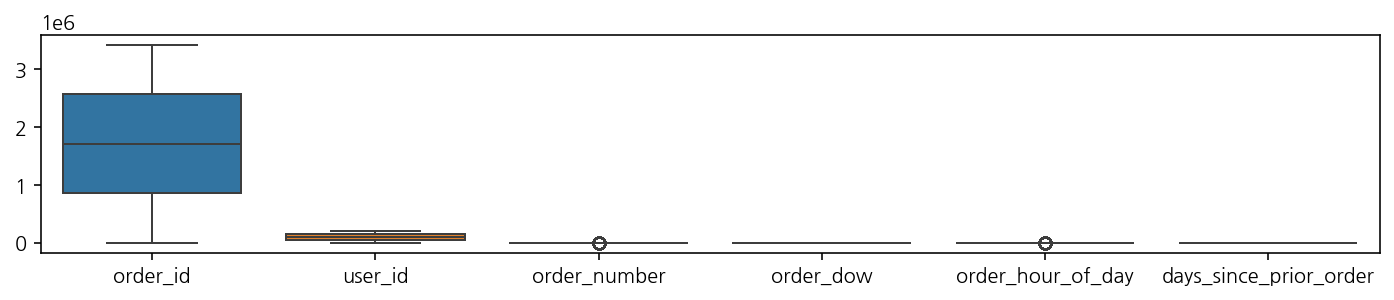

In [30]:
plt.figure(figsize=(12, 2))
sns.boxplot(data=df_order);

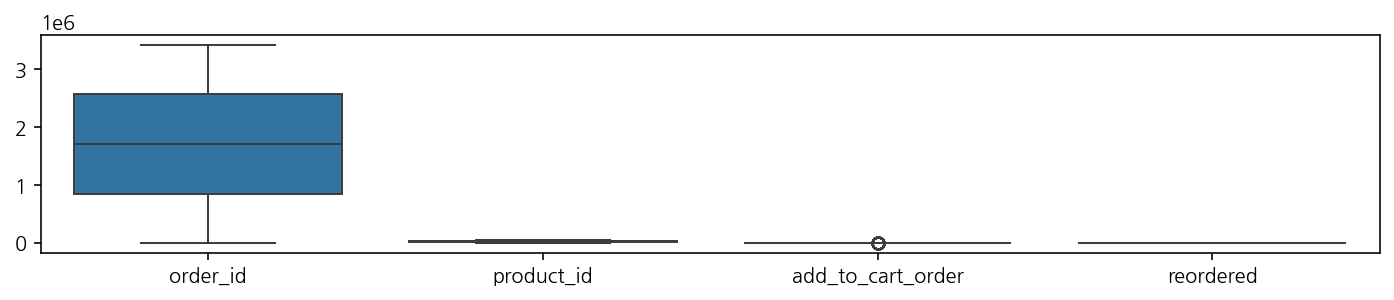

In [31]:
plt.figure(figsize=(12, 2))
sns.boxplot(data=df_p_train);

이상치 제거할 필요가 없어보인다.

In [32]:
df_order['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

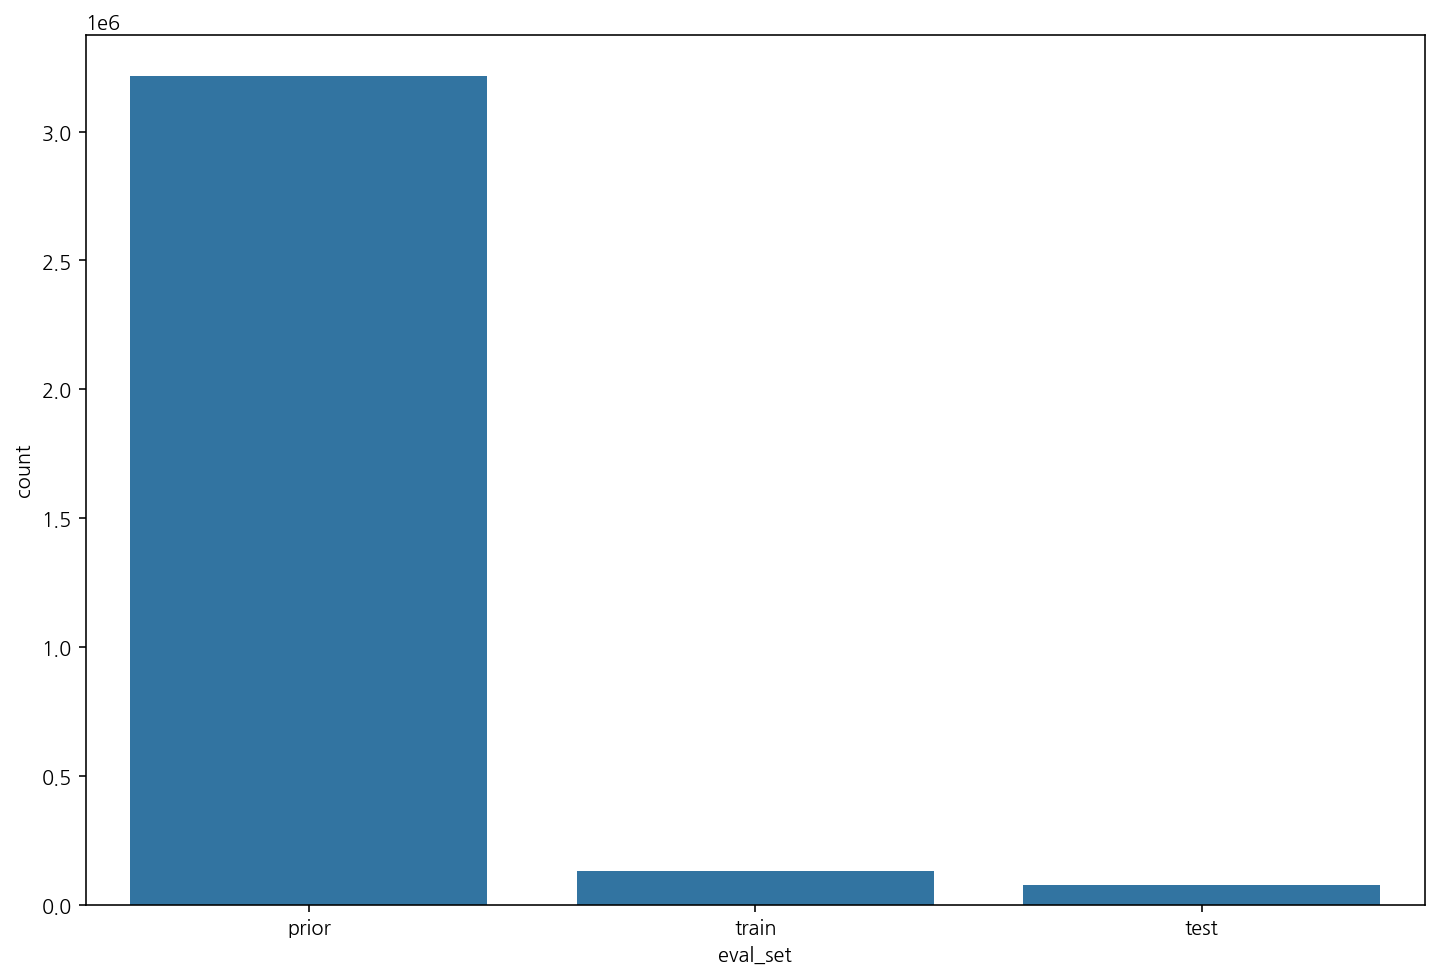

In [33]:
# eval_set에 대해서 시각화 진행
plt.figure(figsize=(12,8))
sns.countplot(data=df_order, x='eval_set')
plt.show()

어떤 요일에 많이 주문을 하나

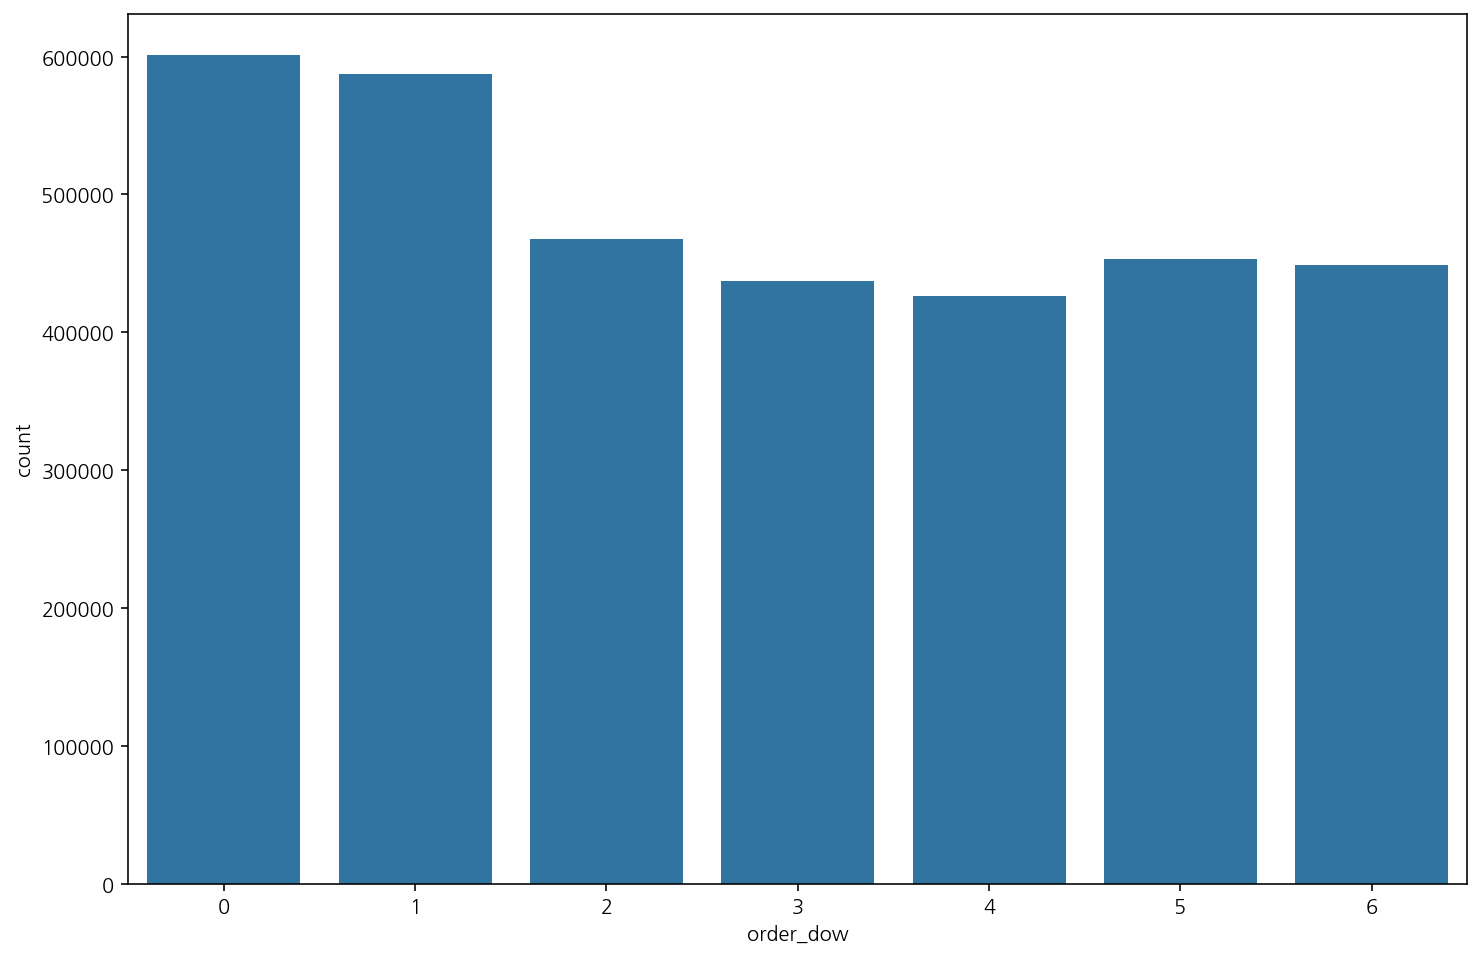

In [34]:
# 요일에 대한 시각화
plt.figure(figsize=(12,8))

sns.countplot(data=df_order, x='order_dow')
plt.show()

하루중 주문을 많이 하는 시간대는?

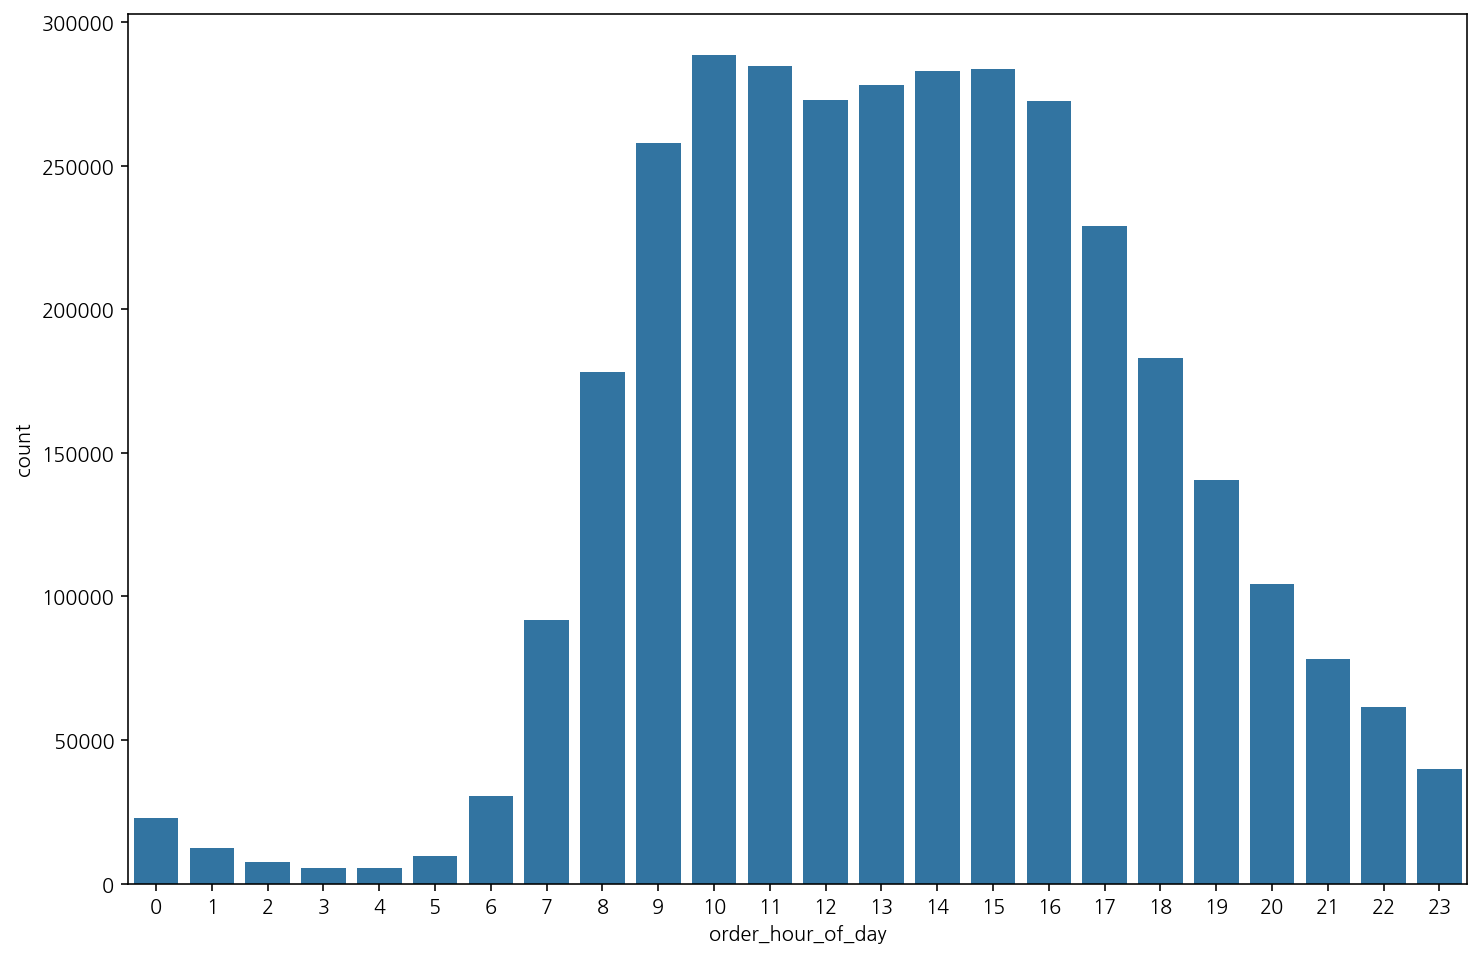

In [35]:
# 하루중 주문을 많이 하는 시간대가 10~11시 사이라는것을 확인
plt.figure(figsize=(12,8))
sns.countplot(data=df_order, x='order_hour_of_day')
plt.show()

사람들은 언제 재주문을하나?

[Text(0.5, 0, 'Hour Of The Day'), Text(0.5, 1.0, 'Reorder Count')]

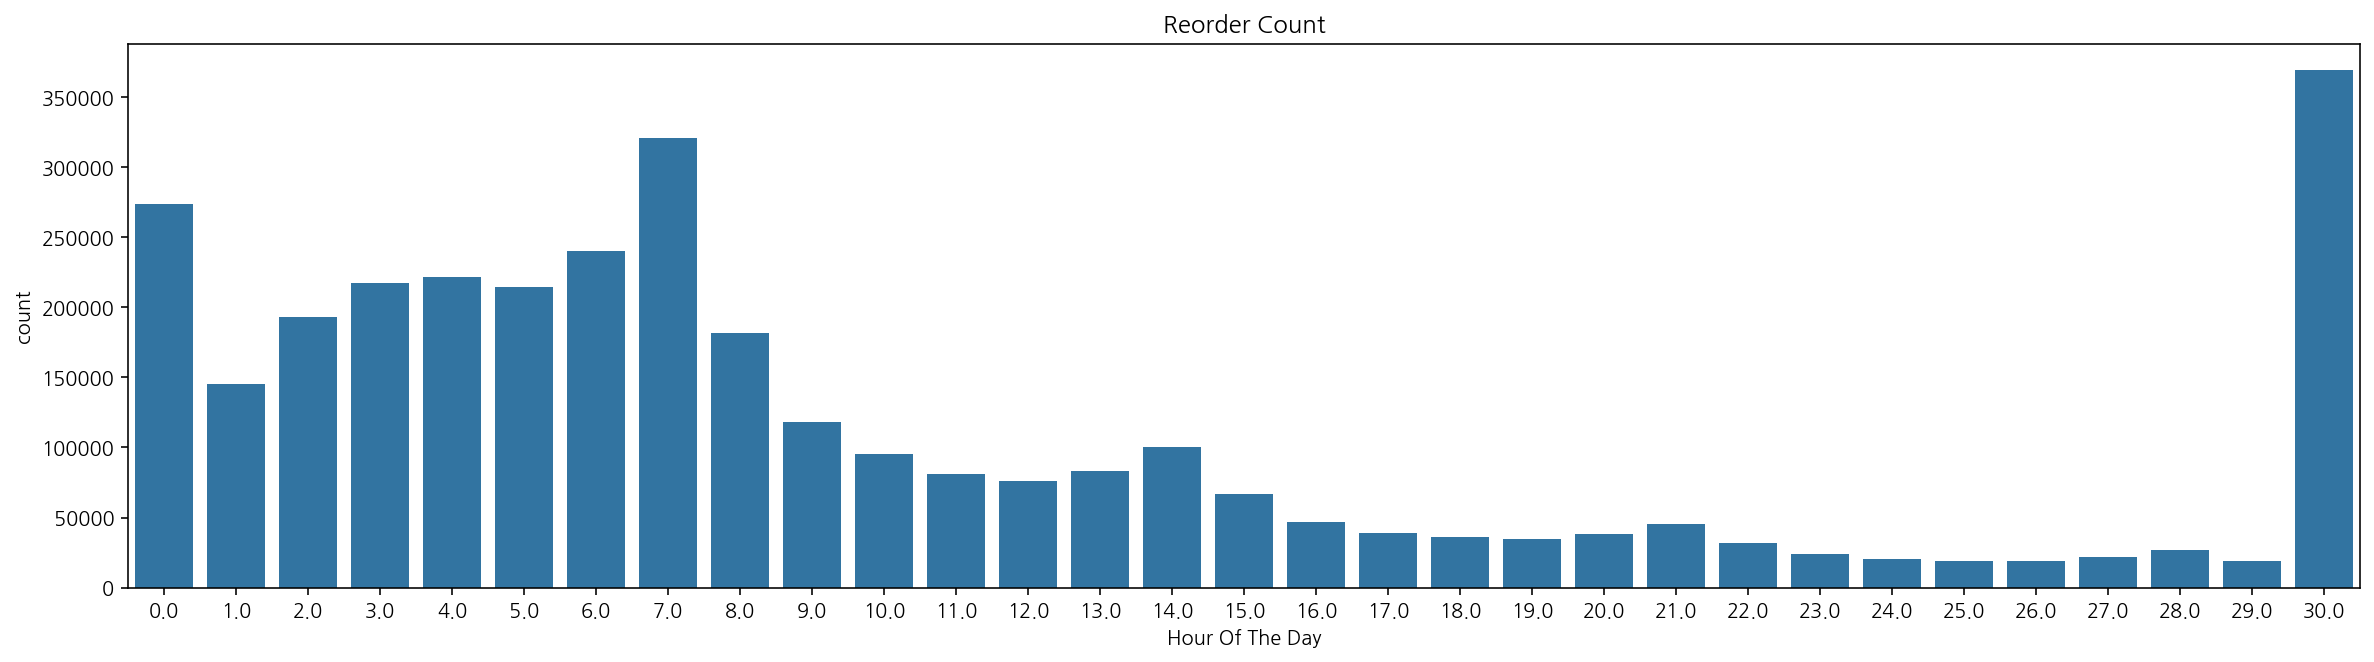

In [36]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(data=df_order,x="days_since_prior_order",ax=ax)
ax.set(xlabel='Hour Of The Day',title="Reorder Count")

[Text(0.5, 0, 'Order Count'), Text(0.5, 1.0, 'Order Count')]

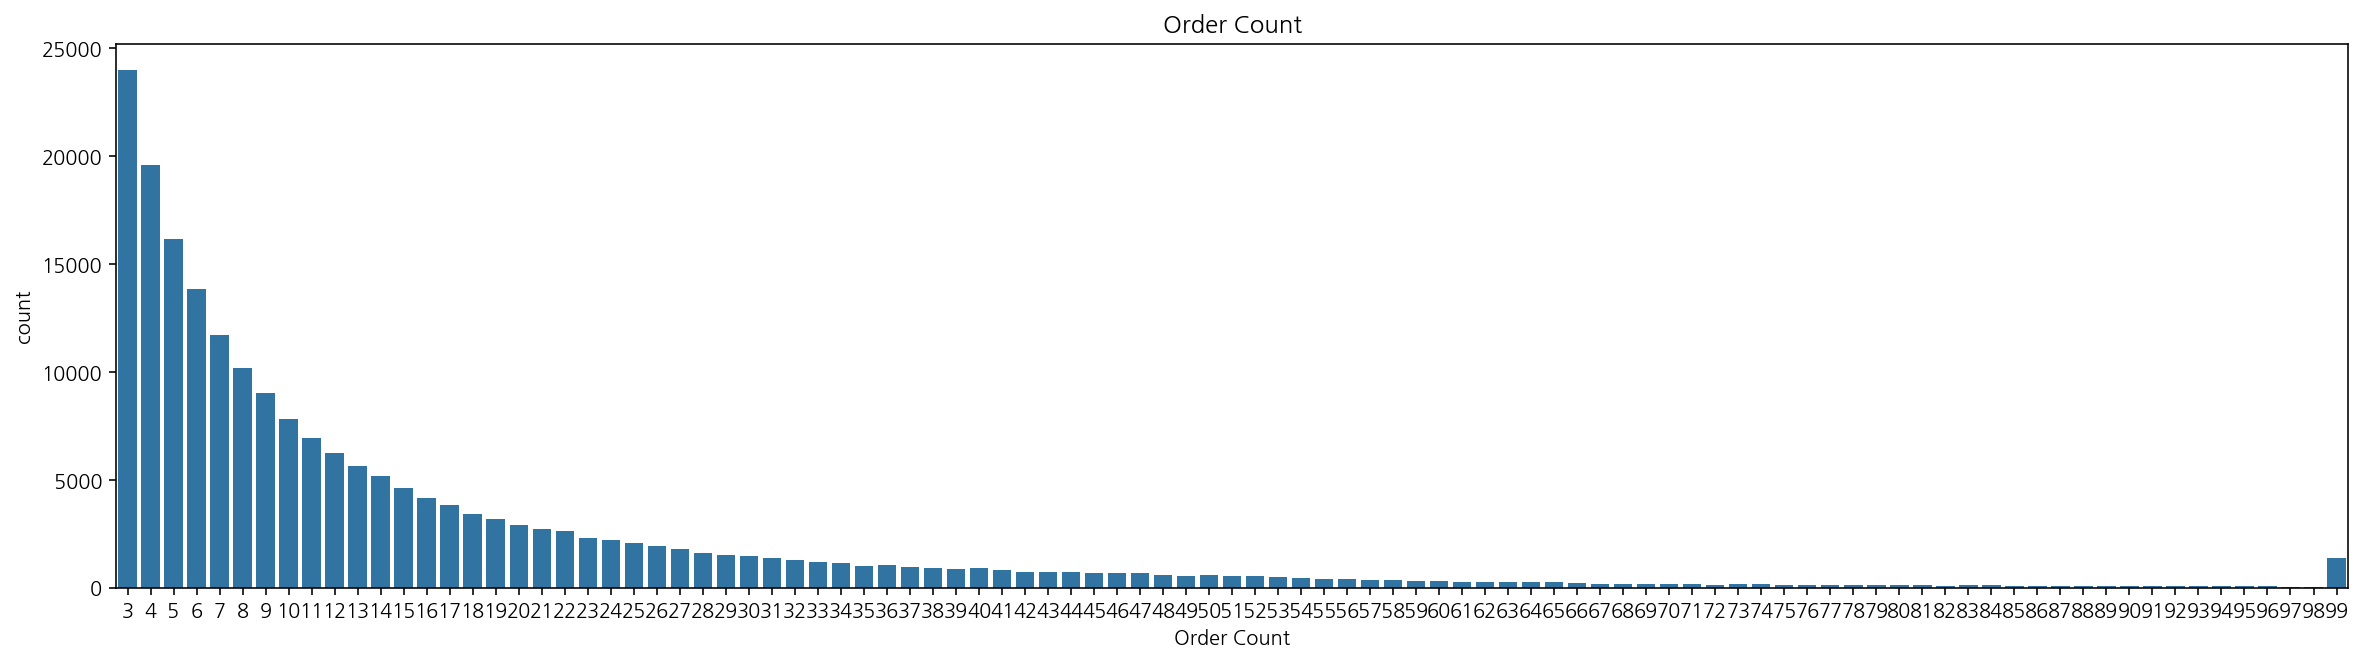

In [37]:
orderCount = df_order[df_order["eval_set"]=="prior"].groupby(by=["user_id"])["order_id"].count().to_frame()
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(data=orderCount,x="order_id",ax=ax)
ax.set(xlabel='Order Count',title="Order Count")

가장 많이 팔린 제품은?

,product_id,count,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4
5,47766,7409,Organic Avocado,24,4
6,47209,7293,Organic Hass Avocado,24,4
7,16797,6494,Strawberries,24,4
8,26209,6033,Limes,24,4
9,27966,5546,Organic Raspberries,123,4


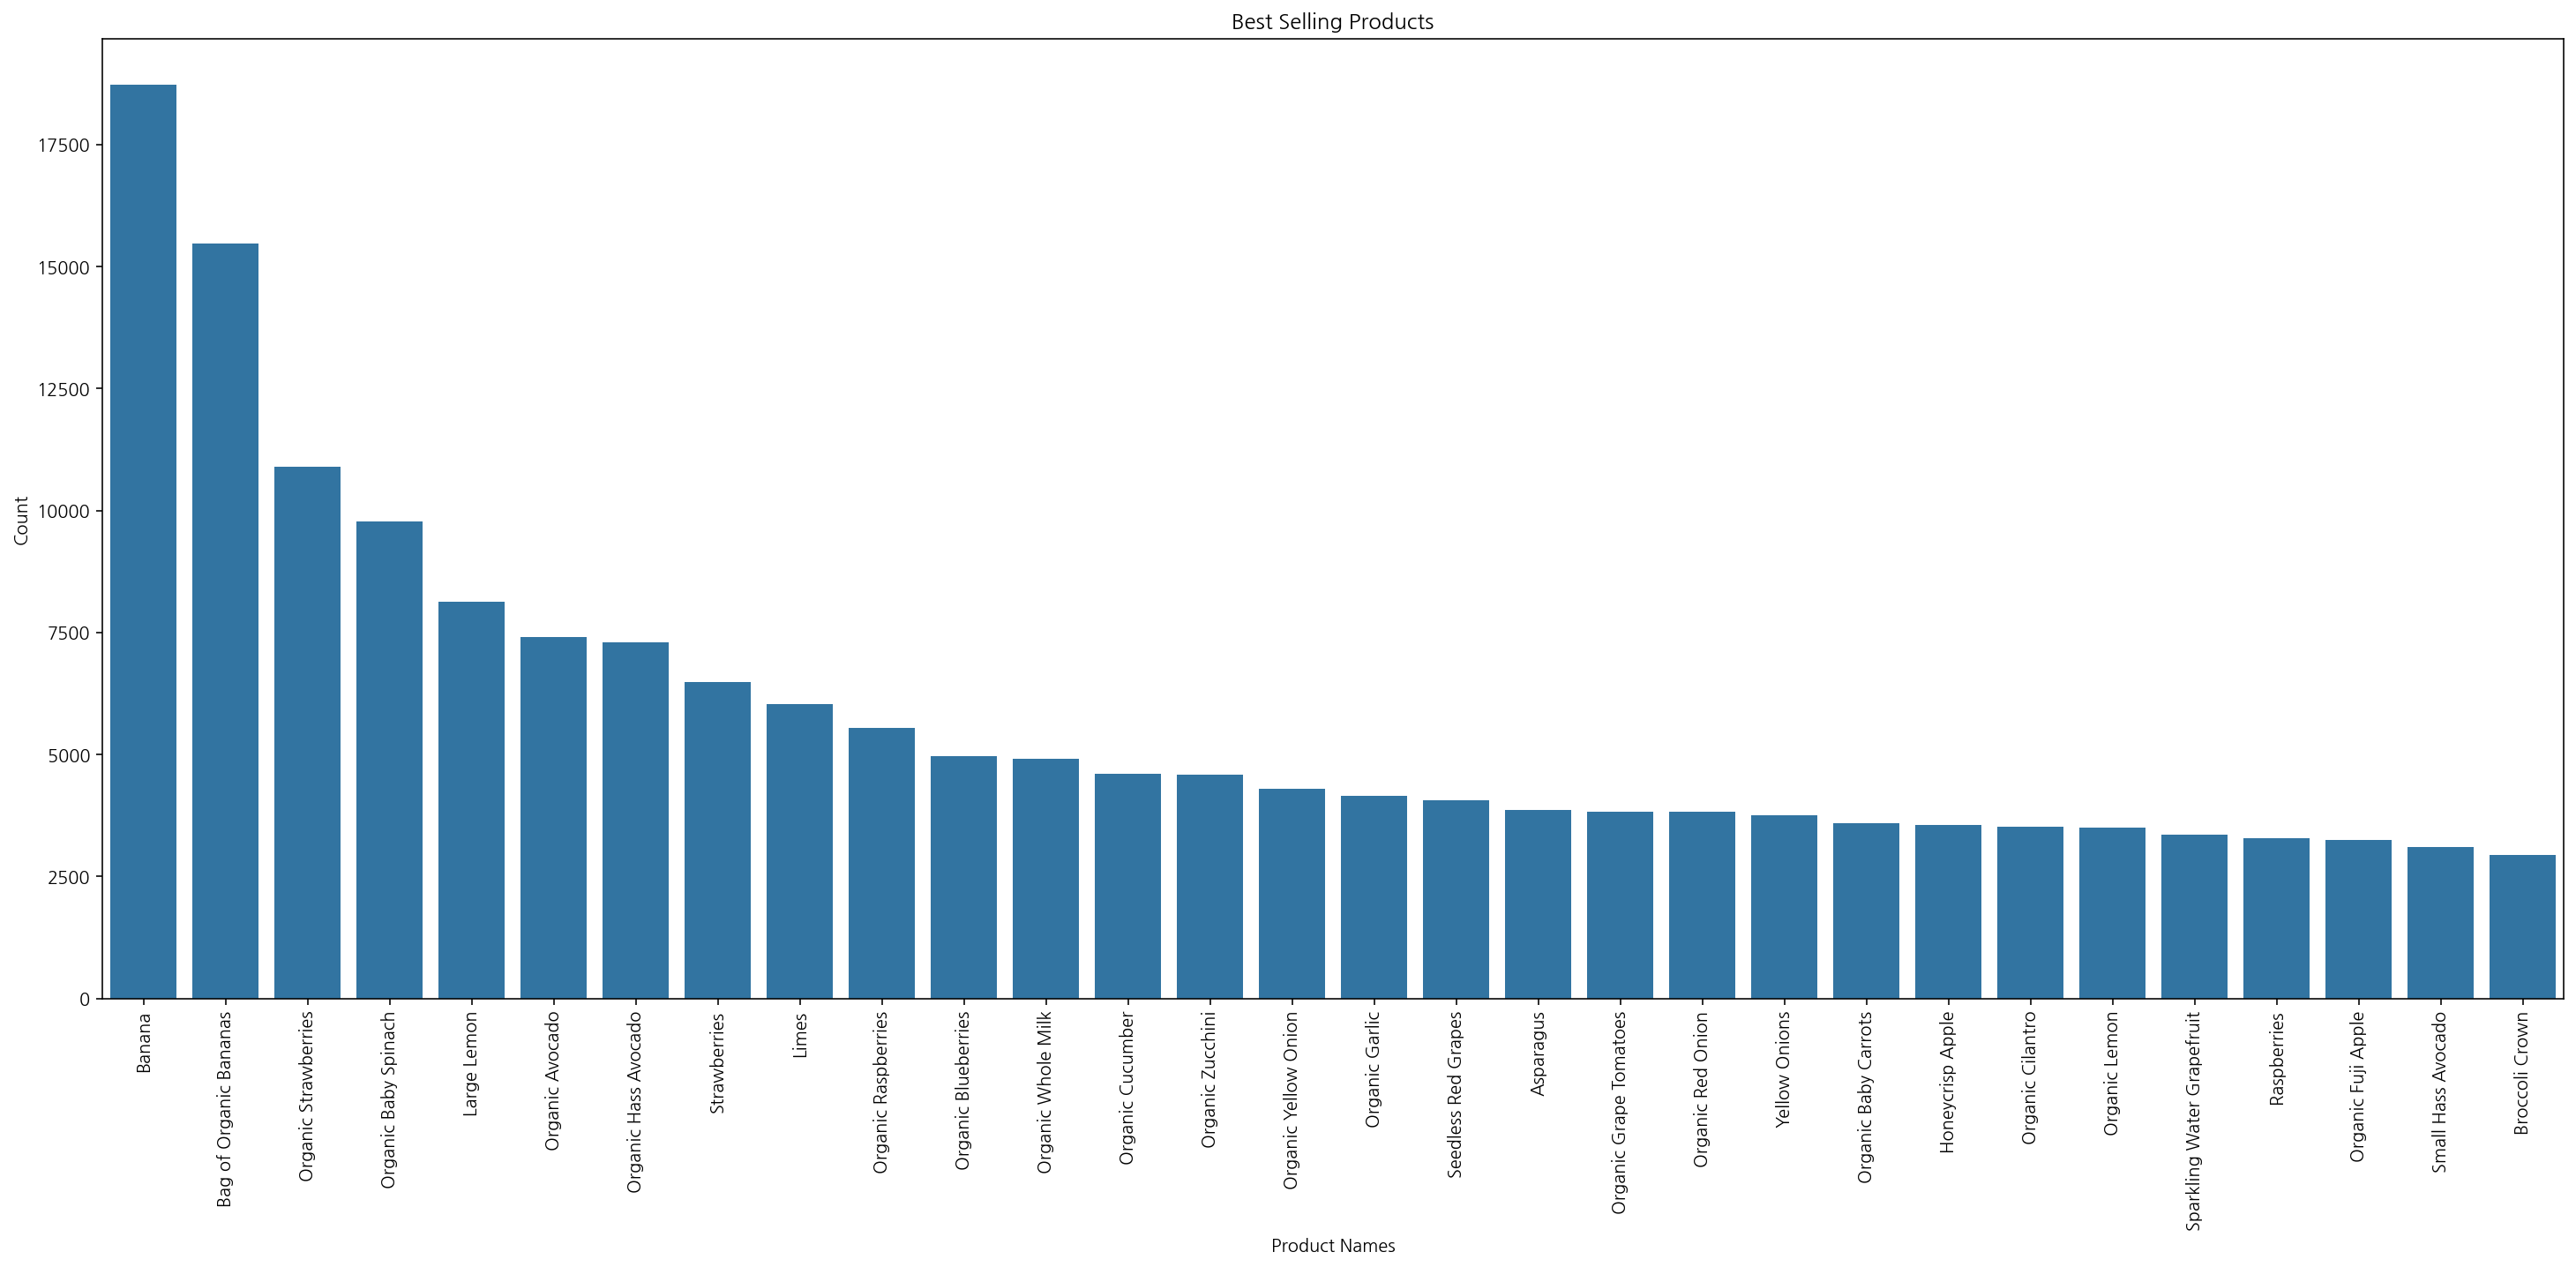

In [38]:
productsCount = df_p_train["product_id"].value_counts().to_frame()
productsCount["count"] = productsCount.product_id
productsCount["product_id"] = productsCount.index
mergedData = pd.merge(productsCount,df_product,how="left",on="product_id").sort_values(by="count",ascending=False)

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.barplot(data=mergedData.head(30),x="product_name",y="count",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Best Selling Products")
plt.xticks(rotation=90)

mergedData.head(10)

처음으로 장바구니에 담는 제품

,product_id,count,reordered_count,first_ordered_ratio,product_name,aisle_id,department_id
0,34728,1,1.0,1.0,Habanero Fire Roasted Salsa,51,13
1,48242,1,1.0,1.0,Honey Lavender Scent Purclean HE Liquid Laundr...,75,17
2,29461,1,1.0,1.0,Organic & Cold-Pressed Vegetable & Fruit Juice...,31,7
3,12177,1,1.0,1.0,Spring & Renewal Heavy Traffic Carpet Foam,114,17
4,43318,1,1.0,1.0,2pk Artisan Thin Pizza Crust,128,3
5,12411,1,1.0,1.0,"Frankfurters, Beef, Colossal",106,12
6,30267,1,1.0,1.0,Seckel Pear,24,4
7,45020,1,1.0,1.0,Arnica Oil,133,11
8,20053,1,1.0,1.0,Clasico Crispy Yellow Corn Tortilla Chips,107,19
9,31723,1,1.0,1.0,Umcka Cold + Flu Multi-Action Natural Relief S...,11,11


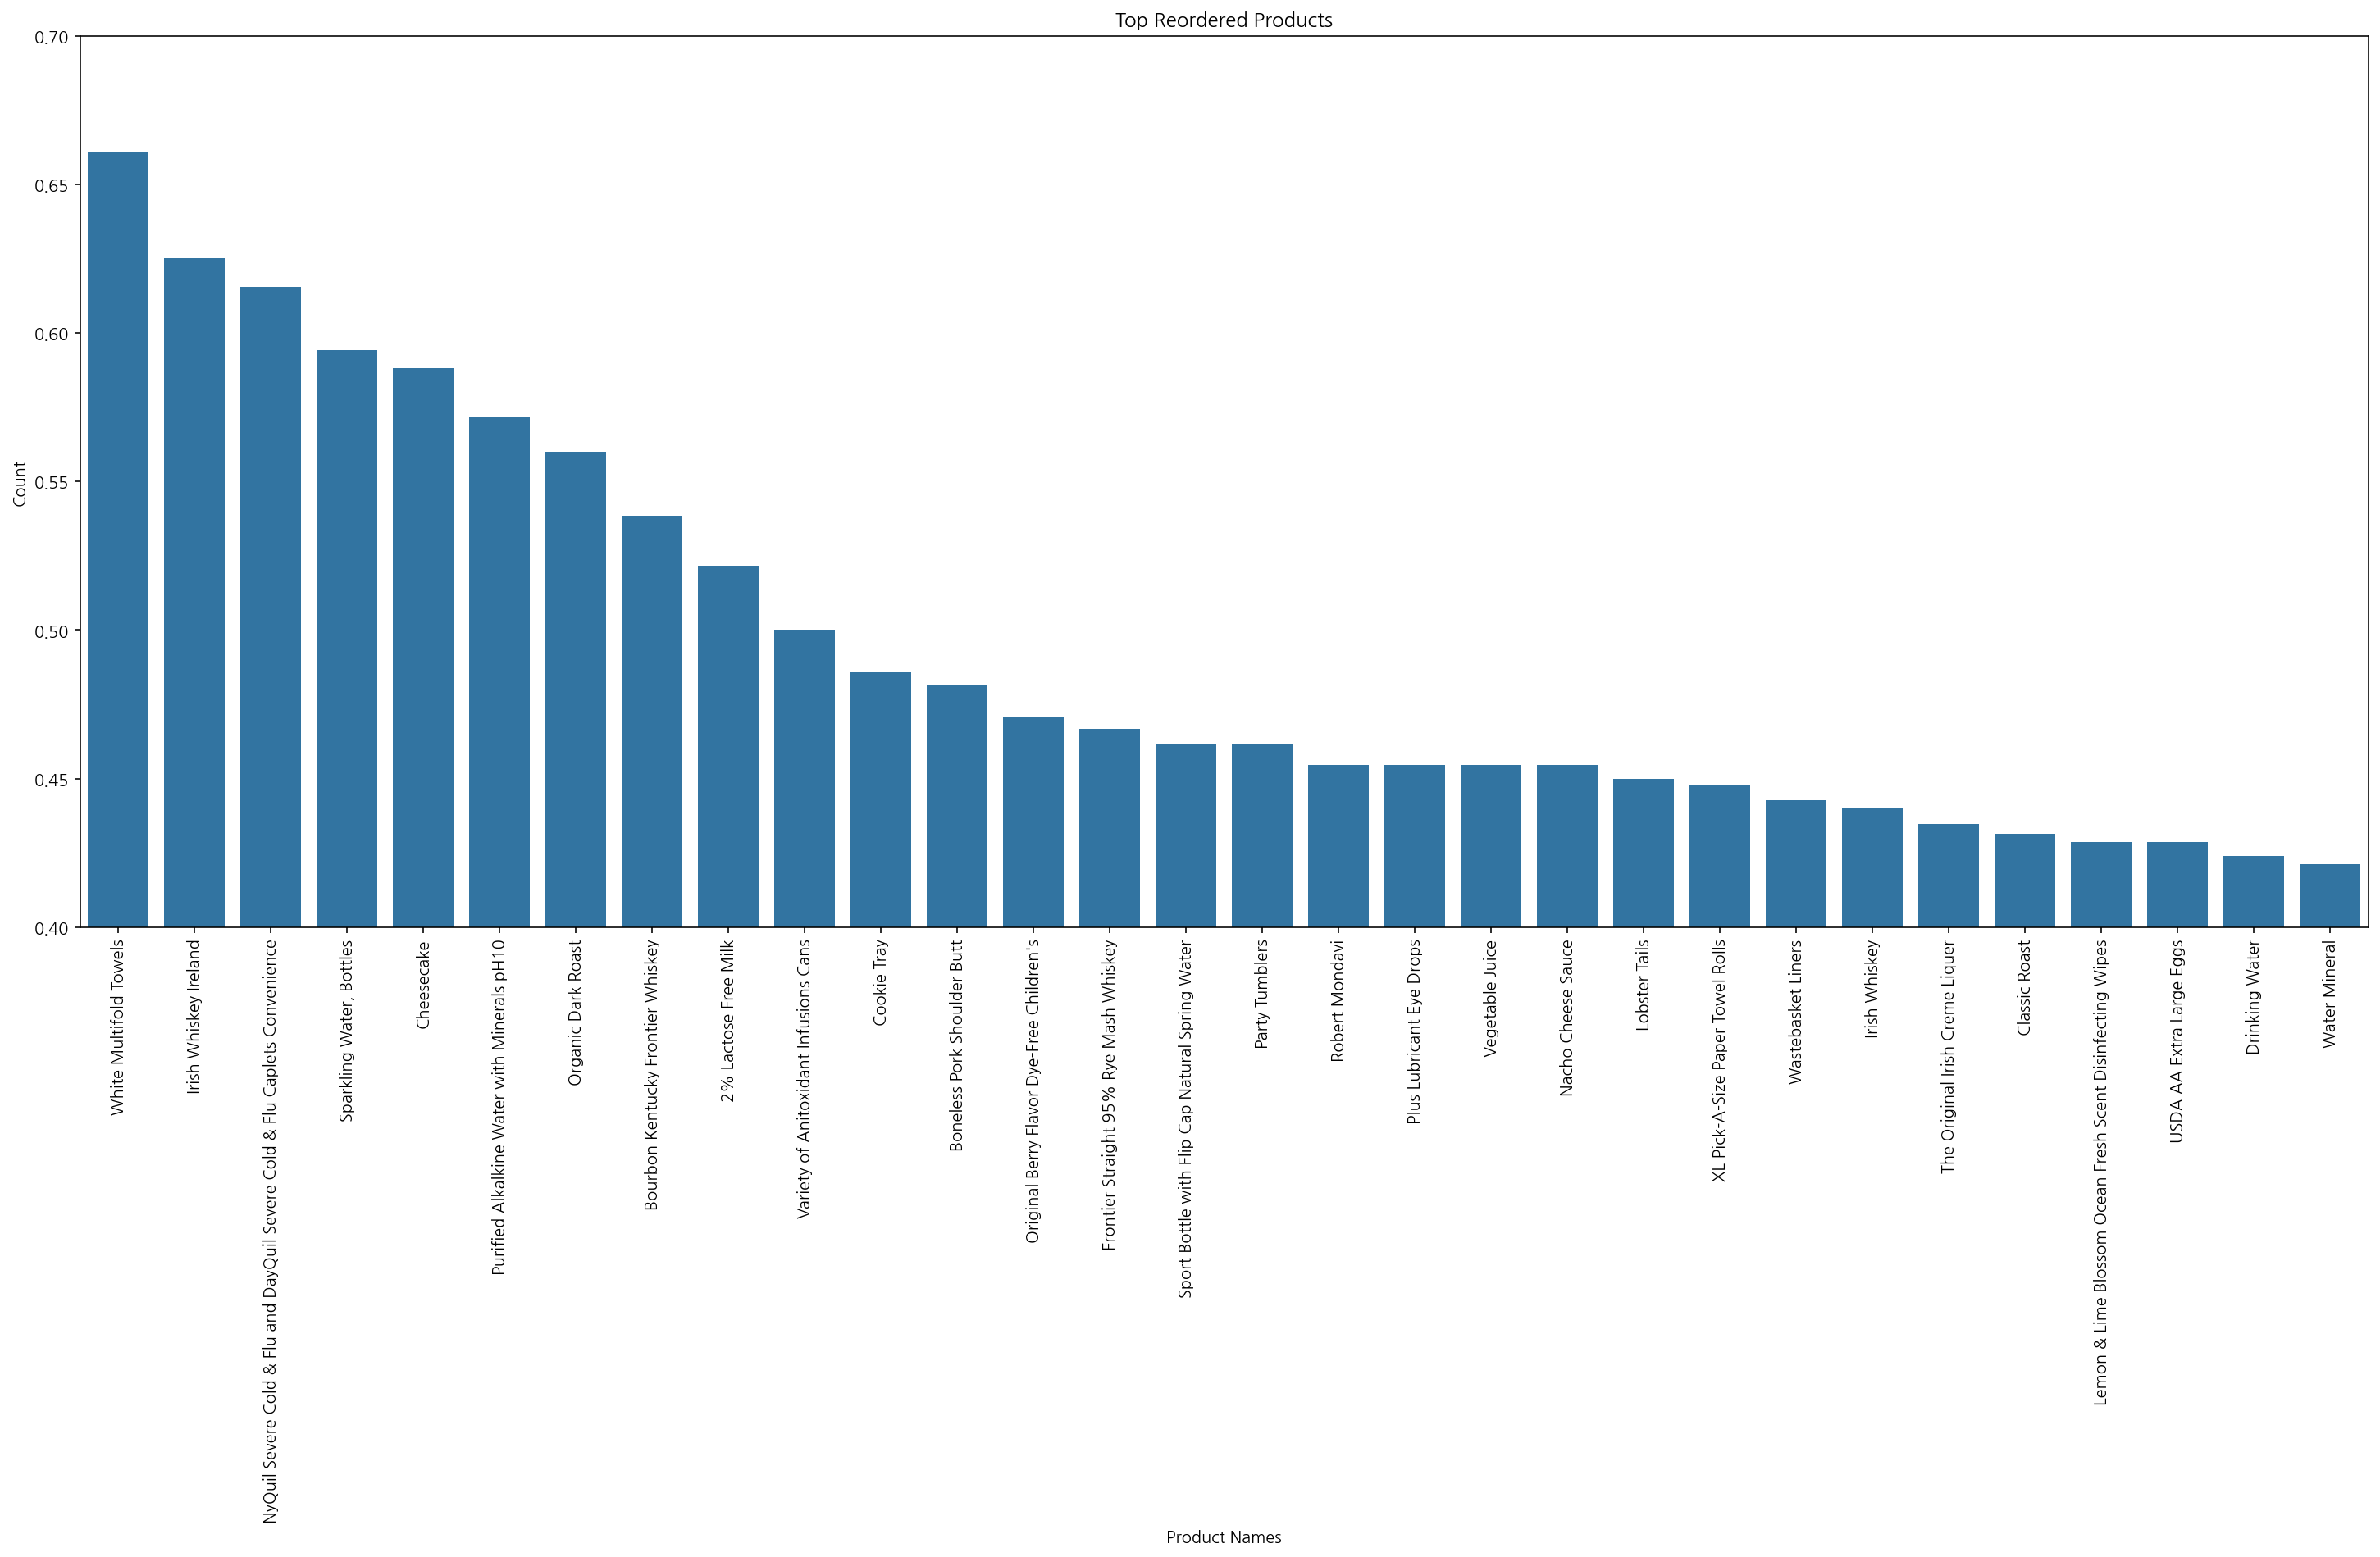

In [39]:
productsCountFirst = df_p_train[df_p_train["add_to_cart_order"]==1]["product_id"].value_counts().to_frame()
productsCountFirst["reordered_count"] = productsCountFirst.product_id
productsCountFirst["product_id"] = productsCountFirst.index
productCountFirstMerged = pd.merge(productsCount,productsCountFirst,how="left",on="product_id").sort_values(by="count",ascending=False)
productCountFirstMerged["first_ordered_ratio"] = productCountFirstMerged["reordered_count"]/productCountFirstMerged["count"]
productCountFirstMerged.sort_values(by="first_ordered_ratio",ascending=False,inplace=True)
firstMerged = pd.merge(productCountFirstMerged,df_product,how="left",on="product_id")


fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.barplot(data=firstMerged[firstMerged["count"]>10].head(30),x="product_name",y="first_ordered_ratio",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top Reordered Products")
ax.set_ylim(0.4,.7)
plt.xticks(rotation=90)

firstMerged.head(10)

In [40]:
df_order.groupby('order_dow')['order_hour_of_day'].describe()

,count,mean,std,min,25%,50%,75%,max
order_dow,,,,,,,,
0,600905.0,13.573993,4.120352,0.0,11.0,14.0,16.0,23.0
1,587478.0,13.176063,4.154275,0.0,10.0,13.0,16.0,23.0
2,467260.0,13.467765,4.255962,0.0,10.0,13.0,17.0,23.0
3,436972.0,13.522555,4.275911,0.0,10.0,13.0,17.0,23.0
4,426339.0,13.585281,4.319606,0.0,10.0,14.0,17.0,23.0
5,453368.0,13.360158,4.245648,0.0,10.0,13.0,16.0,23.0
6,448761.0,13.531044,4.250922,0.0,10.0,13.0,16.0,23.0


왜도와 첨도 확인
- 합치기 전이라서 크게 의미는 없었다.

In [41]:
df_order.skew()

order_id                  0.000000
user_id                   0.006328
order_number              1.812533
order_dow                 0.151306
order_hour_of_day        -0.077689
days_since_prior_order    1.011870
dtype: float64

In [42]:
df_order.kurt()

order_id                 -1.200000
user_id                  -1.199822
order_number              3.464992
order_dow                -1.297523
order_hour_of_day        -0.009958
days_since_prior_order   -0.179443
dtype: float64

데이터 프레임 합치기

In [43]:
# df_aisles,df_p_train , df_depart, df_p_prior, df_sub, df_order, df_product

In [44]:
df_order.head(1)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0


In [45]:
# df_aisles.head(1)

In [46]:
df_p_train.head(1)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1


In [47]:
# df_depart.head(1)


In [48]:
df_p_prior.head(1)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1


In [49]:
df_sub.head(1)

,order_id,products
0,17,39276 29259


In [50]:
# df_product.head(1)

In [51]:
df_totall = pd.merge(df_product, df_aisles, on='aisle_id', how='left')
df_totall

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,2,All-Seasons Salt,104,13,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian
49685,49686,Artisan Baguette,112,3,bread
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care


In [52]:
df_totall = pd.merge(df_totall,df_depart, on='department_id', how='left')
df_totall.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [53]:
df_totall

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [54]:
#너무 많으면 커널이 다운 되어서 32434489개 랜덤 추출, 
df_random_prior = df_p_prior.sample(n=3214874, random_state=42)
df_random_prior

,order_id,product_id,add_to_cart_order,reordered
29481110,3109255,34099,16,0
2852353,301098,41950,5,0
11194500,1181866,45066,8,0
15909397,1678630,8859,2,1
6101870,644090,24781,2,0
...,...,...,...,...
9794105,1034140,34262,7,0
18605390,1962693,11123,7,1
3453311,364839,14540,19,0
925625,97828,45437,25,1


In [55]:
df_totall = pd.merge(df_totall, df_random_prior, on='product_id', how='left')
df_totall

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888.0,11.0,1.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506.0,13.0,1.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664.0,4.0,0.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740.0,2.0,1.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
3220976,49688,Fresh Foaming Cleanser,73,11,facial care,personal care,1219750.0,24.0,0.0
3220977,49688,Fresh Foaming Cleanser,73,11,facial care,personal care,2844538.0,1.0,0.0
3220978,49688,Fresh Foaming Cleanser,73,11,facial care,personal care,393166.0,34.0,0.0
3220979,49688,Fresh Foaming Cleanser,73,11,facial care,personal care,2363598.0,1.0,0.0


In [56]:

df_totall_random = df_totall.sample(n=3214874, random_state=42)
df_totall_random

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
3129529,48204,Tamari Gluten Free Soy Sauce,66,6,asian foods,international,1177787.0,5.0,0.0
2053439,31717,Organic Cilantro,16,4,fresh herbs,produce,280657.0,23.0,0.0
2872754,44910,Organic Spring Mix Salad,123,4,packaged vegetables fruits,produce,186072.0,14.0,0.0
2222869,34423,Pure Organic Pineapple Juice,98,7,juice nectars,beverages,2145726.0,2.0,1.0
1529386,24838,Unsweetened Almondmilk,91,16,soy lactosefree,dairy eggs,1248598.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...
1054271,17902,Liquid Egg Whites,86,16,eggs,dairy eggs,2003963.0,10.0,1.0
2558845,40002,Strawberry Ice Cream,37,1,ice cream ice,frozen,3079984.0,10.0,0.0
128447,2536,Ultra Plush 3 ply Toilet Paper 12 Double Rolls,54,17,paper goods,household,3060110.0,8.0,1.0
2980342,46667,Organic Ginger Root,83,4,fresh vegetables,produce,53716.0,2.0,0.0


In [57]:
df_order_p = df_order[df_order['eval_set'] =='prior']
df_order_p

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0


In [58]:
df_totall = pd.merge(df_totall,df_order_p, on='order_id', how='left')
df_totall

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888.0,11.0,1.0,177411.0,prior,72.0,5.0,1.0,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506.0,13.0,1.0,157915.0,prior,20.0,1.0,9.0,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664.0,4.0,0.0,145504.0,prior,3.0,2.0,14.0,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740.0,2.0,1.0,7981.0,prior,24.0,2.0,13.0,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174.0,1.0,1.0,66968.0,prior,15.0,3.0,16.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220976,49688,Fresh Foaming Cleanser,73,11,facial care,personal care,1219750.0,24.0,0.0,171743.0,prior,5.0,0.0,8.0,30.0
3220977,49688,Fresh Foaming Cleanser,73,11,facial care,personal care,2844538.0,1.0,0.0,90220.0,prior,24.0,0.0,18.0,6.0
3220978,49688,Fresh Foaming Cleanser,73,11,facial care,personal care,393166.0,34.0,0.0,145526.0,prior,23.0,1.0,11.0,11.0
3220979,49688,Fresh Foaming Cleanser,73,11,facial care,personal care,2363598.0,1.0,0.0,153612.0,prior,1.0,6.0,11.0,0.0


In [59]:
df_totall = df_totall.drop(columns=['product_id','aisle_id','department_id','order_id','user_id','eval_set'])
df_totall

,product_name,aisle,department,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,Chocolate Sandwich Cookies,cookies cakes,snacks,11.0,1.0,72.0,5.0,1.0,4.0
1,Chocolate Sandwich Cookies,cookies cakes,snacks,13.0,1.0,20.0,1.0,9.0,20.0
2,Chocolate Sandwich Cookies,cookies cakes,snacks,4.0,0.0,3.0,2.0,14.0,1.0
3,Chocolate Sandwich Cookies,cookies cakes,snacks,2.0,1.0,24.0,2.0,13.0,6.0
4,Chocolate Sandwich Cookies,cookies cakes,snacks,1.0,1.0,15.0,3.0,16.0,15.0
...,...,...,...,...,...,...,...,...,...
3220976,Fresh Foaming Cleanser,facial care,personal care,24.0,0.0,5.0,0.0,8.0,30.0
3220977,Fresh Foaming Cleanser,facial care,personal care,1.0,0.0,24.0,0.0,18.0,6.0
3220978,Fresh Foaming Cleanser,facial care,personal care,34.0,0.0,23.0,1.0,11.0,11.0
3220979,Fresh Foaming Cleanser,facial care,personal care,1.0,0.0,1.0,6.0,11.0,0.0


In [60]:
df_totall.isnull().sum()

product_name                 0
aisle                        0
department                   0
add_to_cart_order         6107
reordered                 6107
order_number              6107
order_dow                 6107
order_hour_of_day         6107
days_since_prior_order    6107
dtype: int64

In [61]:
df_totall = df_totall.dropna()
df_totall

,product_name,aisle,department,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,Chocolate Sandwich Cookies,cookies cakes,snacks,11.0,1.0,72.0,5.0,1.0,4.0
1,Chocolate Sandwich Cookies,cookies cakes,snacks,13.0,1.0,20.0,1.0,9.0,20.0
2,Chocolate Sandwich Cookies,cookies cakes,snacks,4.0,0.0,3.0,2.0,14.0,1.0
3,Chocolate Sandwich Cookies,cookies cakes,snacks,2.0,1.0,24.0,2.0,13.0,6.0
4,Chocolate Sandwich Cookies,cookies cakes,snacks,1.0,1.0,15.0,3.0,16.0,15.0
...,...,...,...,...,...,...,...,...,...
3220976,Fresh Foaming Cleanser,facial care,personal care,24.0,0.0,5.0,0.0,8.0,30.0
3220977,Fresh Foaming Cleanser,facial care,personal care,1.0,0.0,24.0,0.0,18.0,6.0
3220978,Fresh Foaming Cleanser,facial care,personal care,34.0,0.0,23.0,1.0,11.0,11.0
3220979,Fresh Foaming Cleanser,facial care,personal care,1.0,0.0,1.0,6.0,11.0,0.0


In [62]:
corr = df_totall.corr(numeric_only=True)
corr

,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order
add_to_cart_order,1.000000,-0.133618,-0.004108,-0.009371,-0.014500,0.050503
reordered,-0.133618,1.000000,0.306647,-0.006541,-0.023140,-0.024838
order_number,-0.004108,0.306647,1.000000,0.015421,-0.040029,-0.257689
order_dow,-0.009371,-0.006541,0.015421,1.000000,0.012848,-0.027110
order_hour_of_day,-0.014500,-0.023140,-0.040029,0.012848,1.000000,-0.000058
days_since_prior_order,0.050503,-0.024838,-0.257689,-0.027110,-0.000058,1.000000


In [63]:
ones = np.ones(corr.shape)
ones

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

<AxesSubplot:>

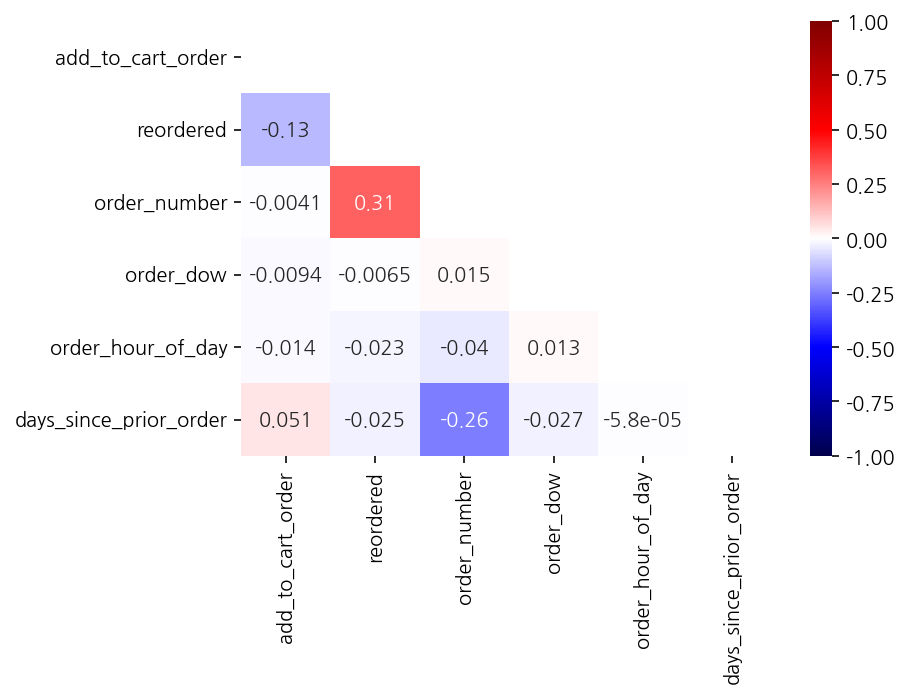

In [64]:
# seismic_r 에서 _r 은 색상 반전을 의미합니다.
sns.heatmap(corr, annot=True, cmap="seismic", mask=np.triu(ones), vmin=-1, vmax=1)

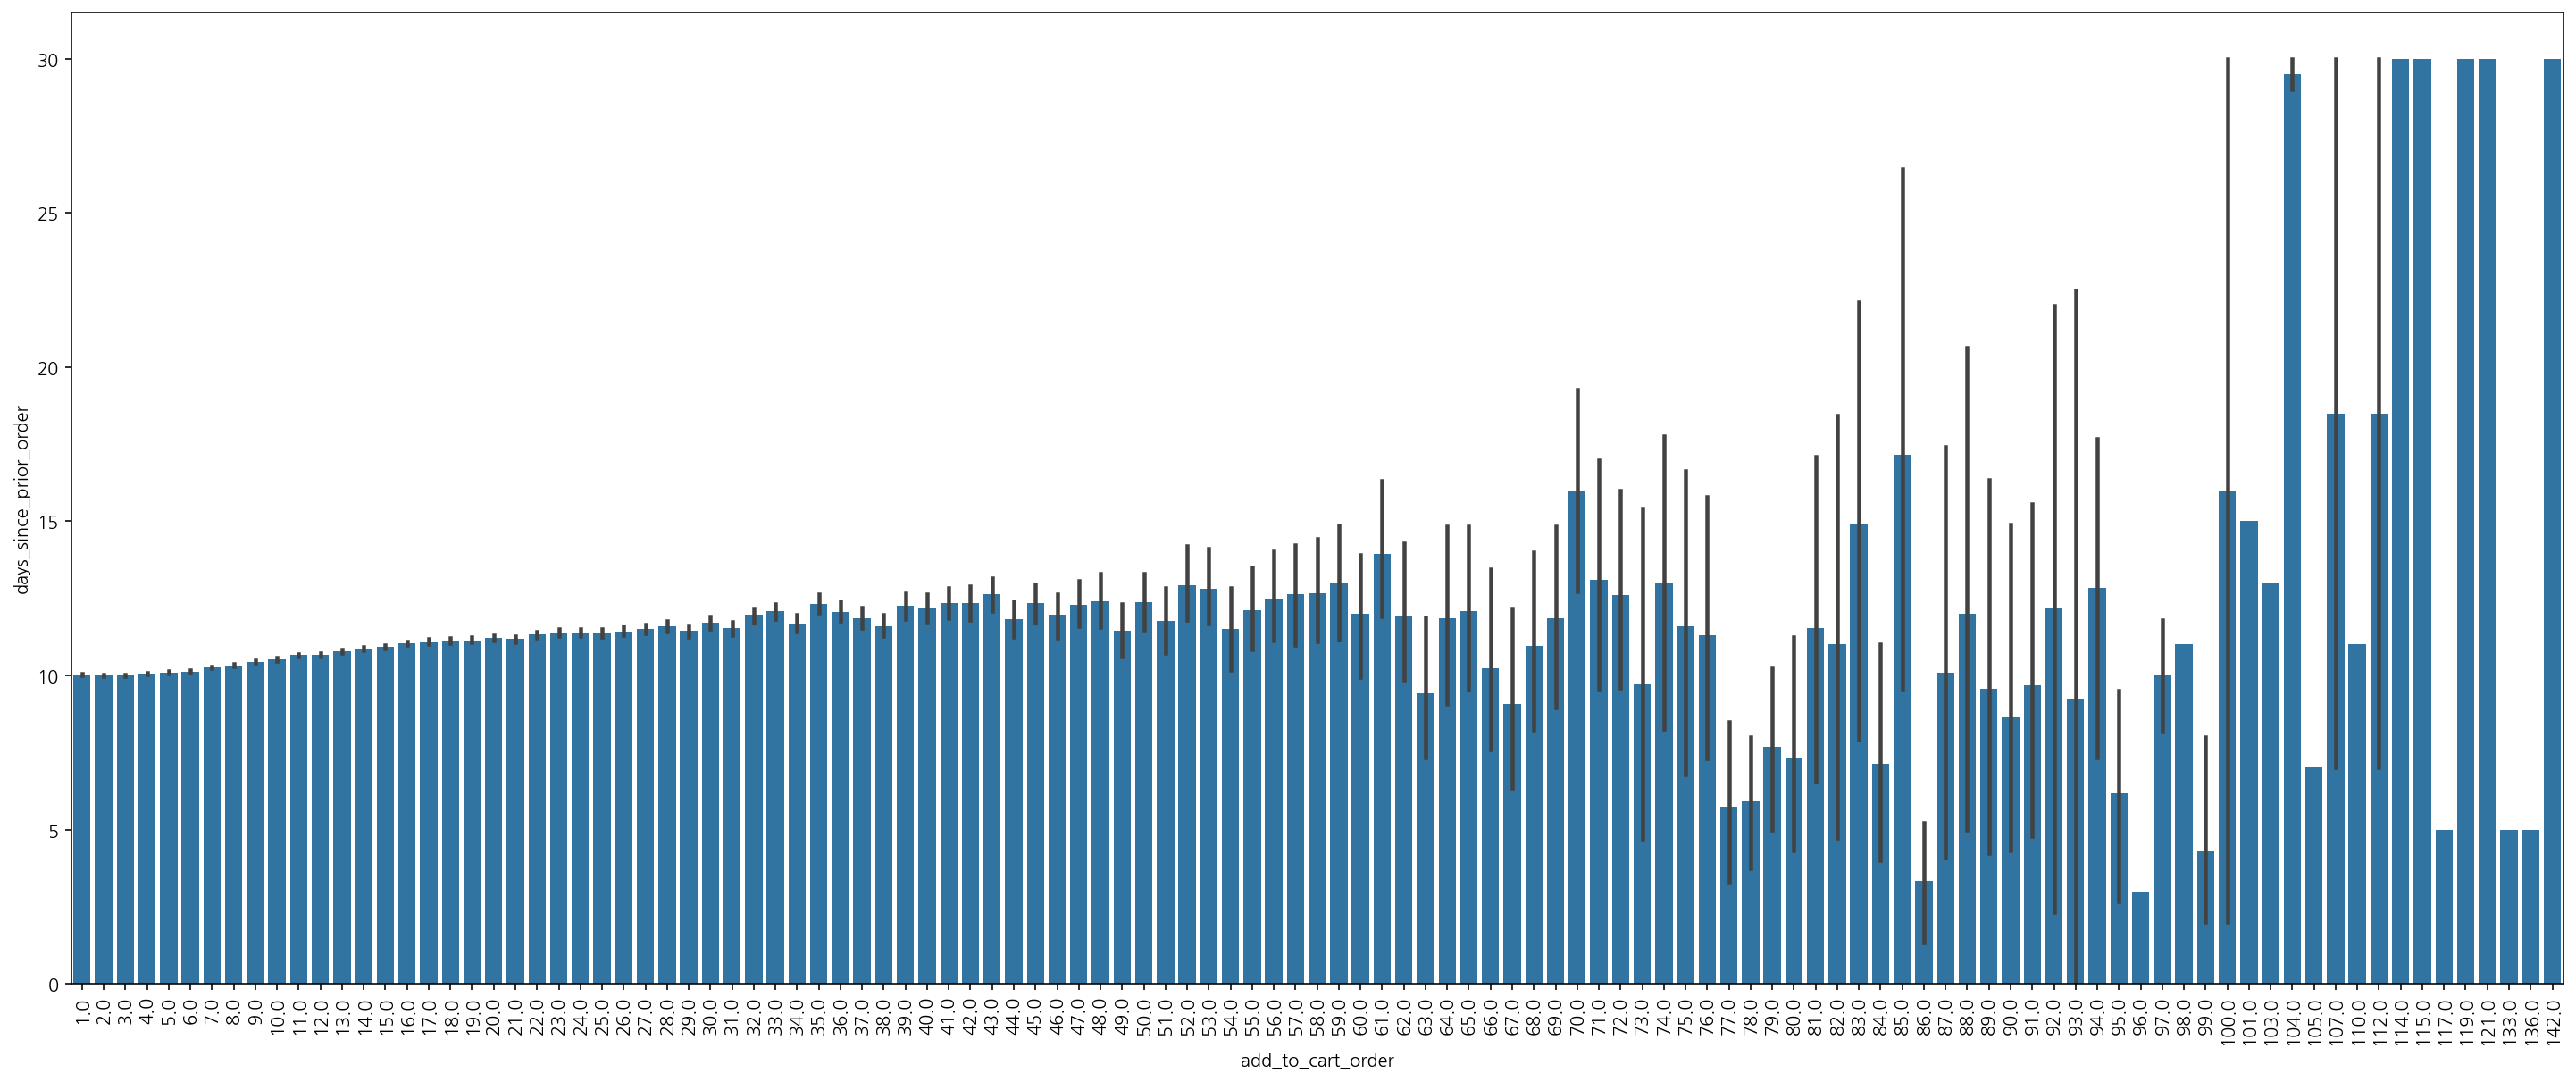

In [65]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(data=df_totall, x='add_to_cart_order', y='days_since_prior_order',errorbar=('ci'));

In [66]:
from scipy import stats

# 월별 지출(MonthlyCharges) 데이터 추출
add_to_cart_order = df_totall['add_to_cart_order']

# 점추정: 월별 지출의 표본 평균 계산
point_estimate = add_to_cart_order.mean()
print(f"표본평균: {point_estimate:.2f}")

# 구간 추정: 95% 신뢰구간 계산
# 표본 크기, 표본 평균, 표본 표준편차 계산
sample_size = len(add_to_cart_order) 
print(f"표본크기: {sample_size :.2f}")

sample_mean = add_to_cart_order.mean()
print(f"표본 평균: {sample_mean:.2f}")

# 표본 표준편차 (자유도 n-1 사용)
sample_std = np.std(add_to_cart_order, ddof=1)
print(f"표준편차: {sample_std:.2f}")


표본평균: 8.36
표본크기: 3214874.00
표본 평균: 8.36
표준편차: 7.14


In [67]:
# 신뢰구간 계산 (t-분포 사용)
# stats.t.ppf 로 t_critical 구하기
confidence_level = 0.95
alpha = 1 - confidence_level

t_critical = stats.t.ppf(1 - alpha/2, df=sample_size-1)  # t-분포의 임계값
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

point_estimate, confidence_interval

(8.36176534445829, (8.35395649494388, 8.3695741939727))

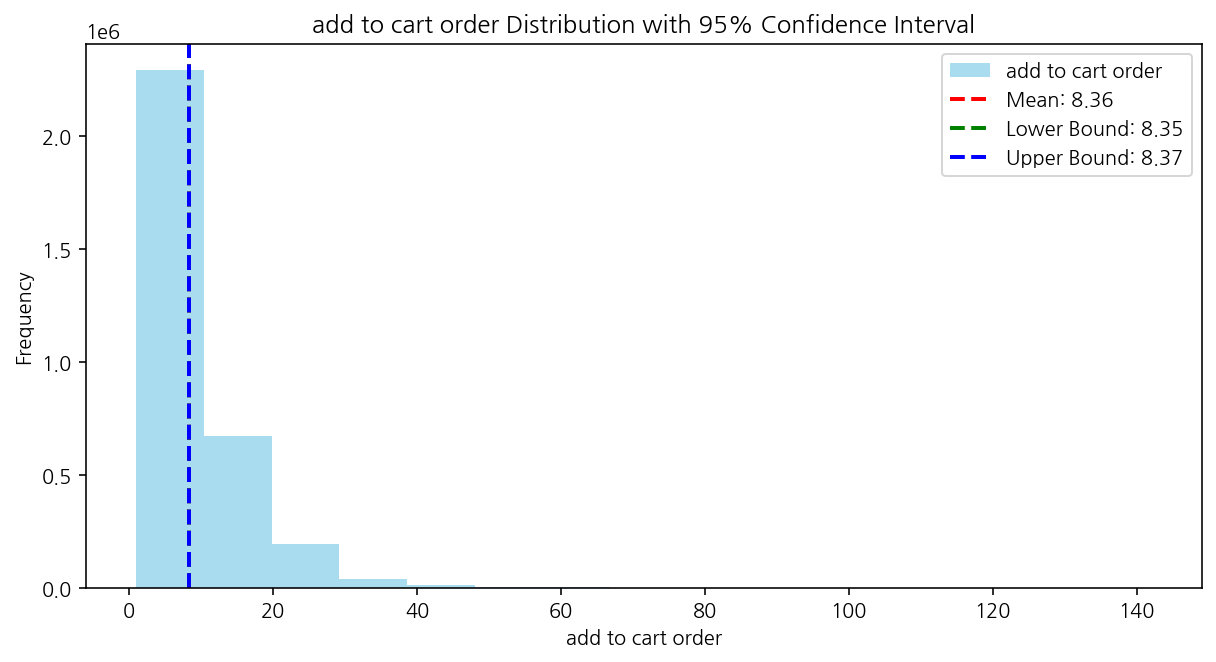

In [68]:
# 점추정 및 신뢰구간 시각화
plt.figure(figsize=(10, 5))
plt.hist(add_to_cart_order, bins=15, color='skyblue', alpha=0.7, label='add to cart order')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='blue', linestyle='dashed', linewidth=2, label=f'Upper Bound: {confidence_interval[1]:.2f}')
plt.xlabel('add to cart order')
plt.ylabel('Frequency')
plt.title('add to cart order Distribution with 95% Confidence Interval')
plt.legend()
plt.show()


<AxesSubplot:xlabel='add_to_cart_order', ylabel='Count'>

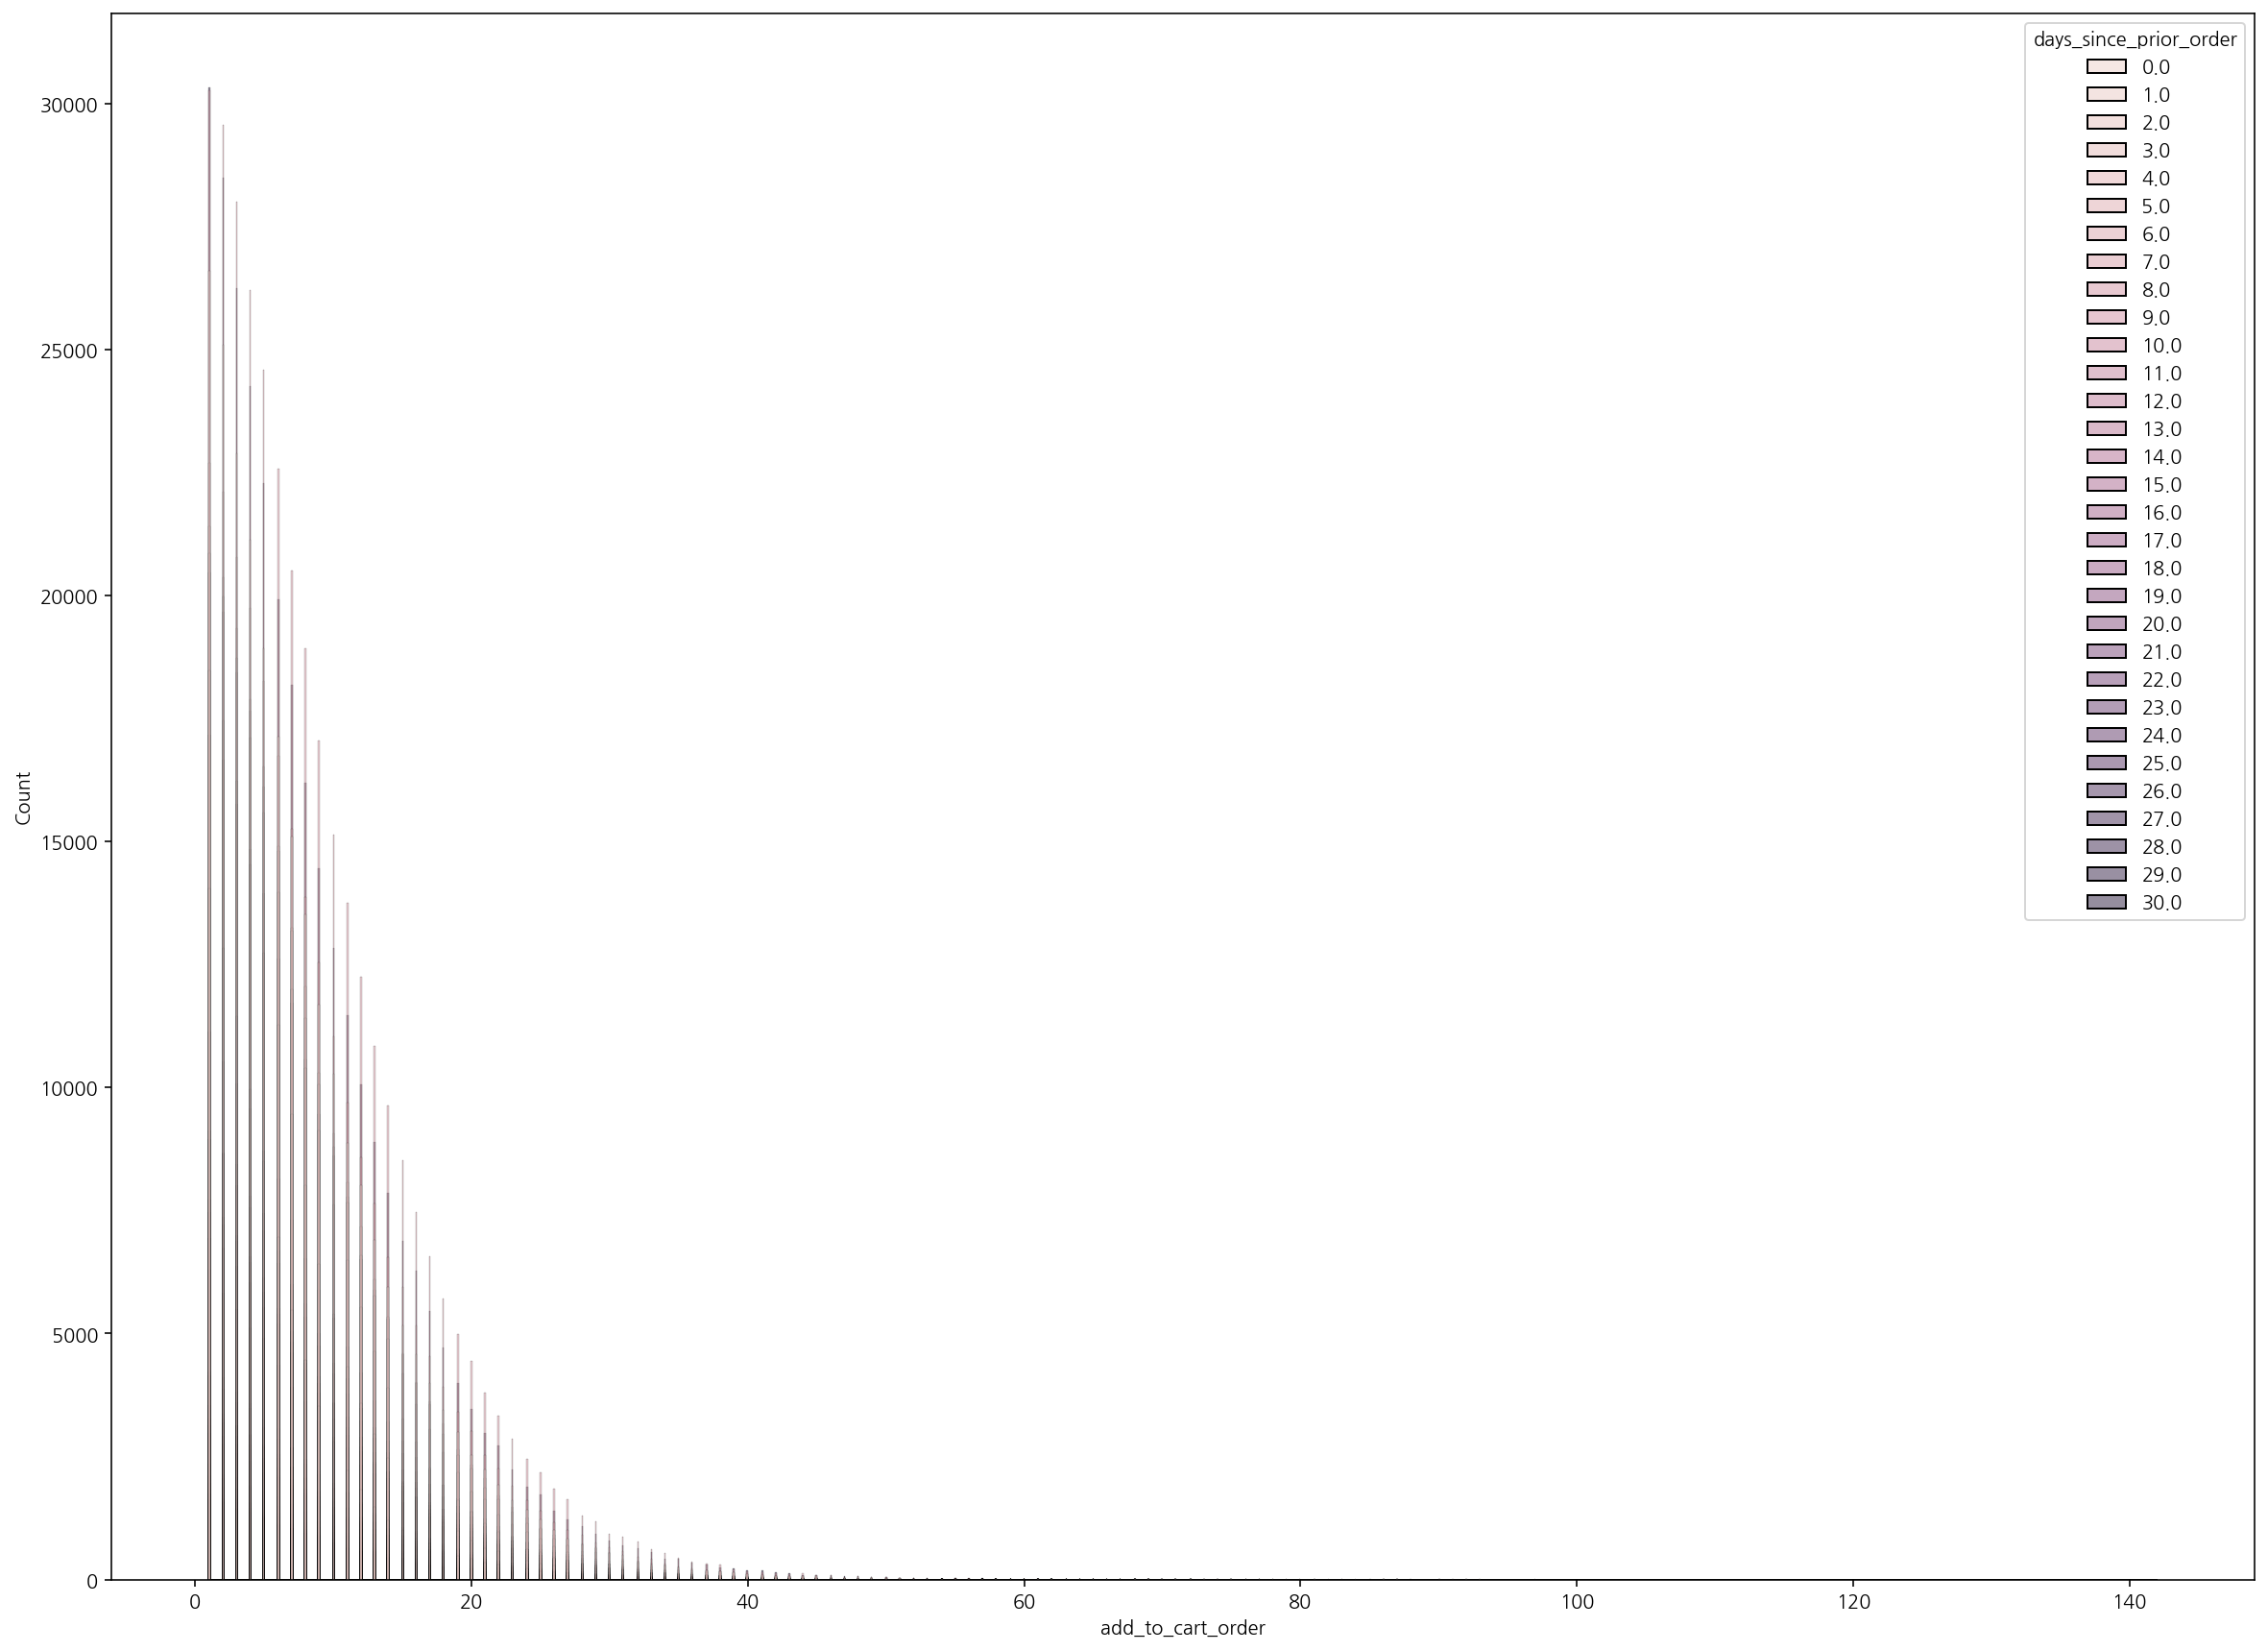

In [69]:
plt.figure(figsize=(20, 15))
sns.histplot(data=df_totall, x='add_to_cart_order', hue='days_since_prior_order')

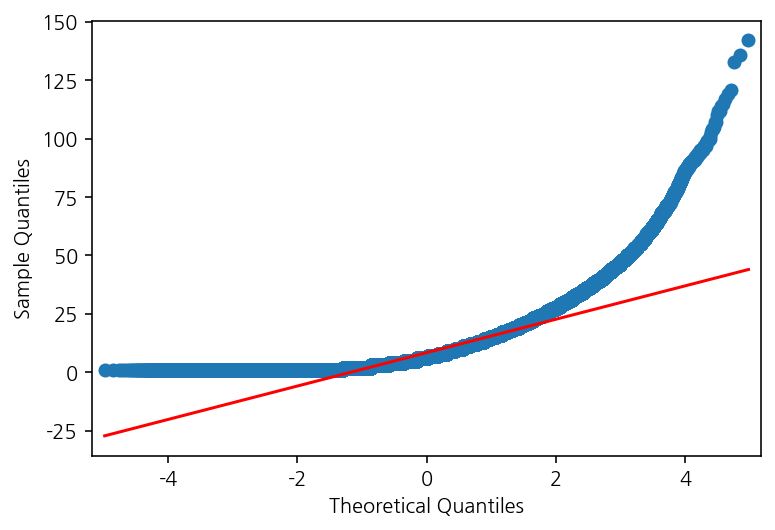

In [70]:
import statsmodels.api as sm

sm.qqplot(data=df_totall["add_to_cart_order"], line="s");

In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [72]:
# 분산분석(ANOVA) 수행
model = ols("add_to_cart_order ~ C(days_since_prior_order)", data=df_totall).fit()
# anova_lm
sm.stats.anova_lm(model, typ=2).round(2)

,sum_sq,df,F,PR(>F)
C(days_since_prior_order),1.862755e+06,30.0,1230.69,0.0
Residual,1.621983e+08,3214843.0,NaN,NaN


In [73]:
# 다중비교 (Tukey's HSD)
tukey = pairwise_tukeyhsd(endog=df_totall["add_to_cart_order"], groups=df_totall["days_since_prior_order"])
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -2.1639    0.0 -2.2664 -2.0613   True
   0.0    2.0  -1.5757    0.0 -1.6639 -1.4876   True
   0.0    3.0   -0.905    0.0 -0.9868 -0.8232   True
   0.0    4.0  -0.3202    0.0 -0.3997 -0.2407   True
   0.0    5.0   0.1329    0.0  0.0539  0.2119   True
   0.0    6.0   0.6052    0.0  0.5296  0.6809   True
   0.0    7.0   0.9067    0.0  0.8365   0.977   True
   0.0    8.0   0.7437    0.0  0.6625  0.8249   True
   0.0    9.0   0.6325    0.0  0.5387  0.7263   True
   0.0   10.0   0.6181    0.0  0.5167  0.7195   True
   0.0   11.0   0.7265    0.0  0.6187  0.8344   True
   0.0   12.0    0.806    0.0  0.6958  0.9162   True
   0.0   13.0   0.8397    0.0  0.7332  0.9462   True
   0.0   14.0   0.8896    0.0  0.7904  0.9889   True
   0.0   15.0   0.7568    0.0  0.6403  0.8732   True
   0.0   16.0   0.6797    0.0  0.5435  0.8159 

In [74]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
X = df_totall[['add_to_cart_order']]
y = df_totall['days_since_prior_order']
X.shape, y.shape

((3214874, 1), (3214874,))

In [76]:
# 데이터 분할 - train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2571899, 1), (642975, 1), (2571899,), (642975,))

In [77]:
# Scikit-Learn을 사용한 단순 회귀 모델 훈련
model_sklearn = LinearRegression()
# fit
model_sklearn.fit(X_train, y_train)
# model_sklearn

LinearRegression()

In [78]:
y_pred_sklearn = model_sklearn.predict(X_test)
y_pred_sklearn

array([10.94394594,  9.98938077, 10.30756916, ..., 10.75303291,
        9.98938077, 10.24393149])

<AxesSubplot:xlabel='days_since_prior_order'>

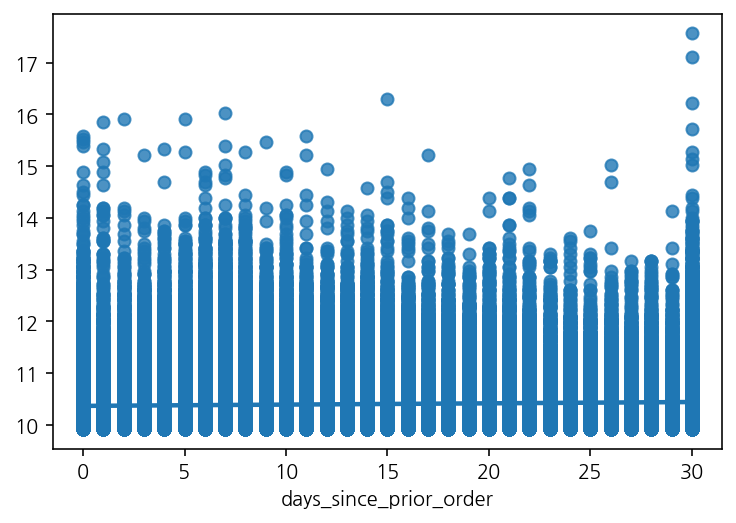

In [79]:
sns.regplot(x=y_test, y=y_pred_sklearn)

<AxesSubplot:xlabel='days_since_prior_order'>

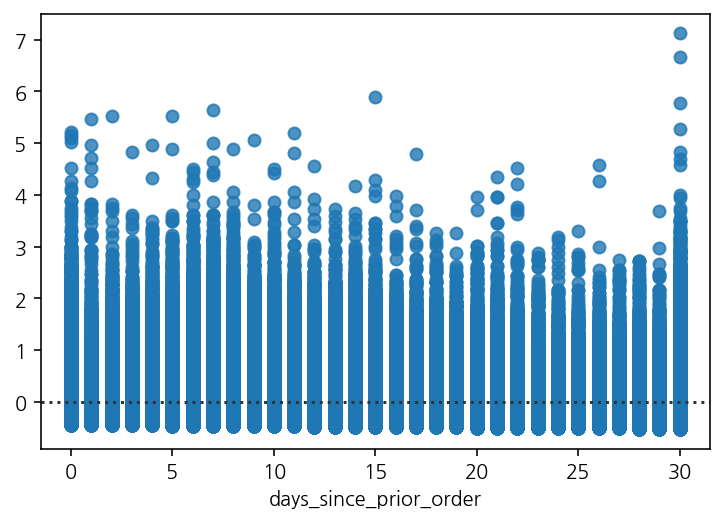

In [80]:
sns.residplot(x=y_test, y=y_pred_sklearn)

In [81]:
# 모델 평가 - mean_squared_error
# mse_sklearn
mean_squared_error(y_test, y_pred_sklearn)

79.30908674420048

In [82]:
# 결정 계수
# R² 계산 함수 정의
def calculate_r_squared(actual, predicted):
    mean_actual = np.mean(actual)
    total_variance = np.sum((actual - mean_actual)**2)
    explained_variance = np.sum((predicted - mean_actual)**2)
    r_squared = 1 - explained_variance / total_variance
    return r_squared

# R² 계산
r_squared = calculate_r_squared(y_test, y_pred_sklearn)
r_squared

0.9973978481486558

회고
- 데이터를 시각화와 데이터프레임을 합치는 작업을 많이 할 수 있었다.
- 데이터를 보아도 어떠한 방식으로 해야할지 잘 떠오르지 않아서 많이 어려웠다.
- 그러다 분석의 결과와 가정 설정을 하는데 많이 부족했다.
- 데이터가 많아보니 커널 끊기는 문제점이 있었다.
- 이전에 장바구니를 담으면 장바구니 주문을 할 것이다라고 진행을 했지만 제대로 끝을 못 맺었다.